In [1]:
from scipy.integrate import odeint
from scipy.integrate import quad, solve_ivp
from scipy import integrate
import numpy as np
import ZebraLib as zb
import pandas as pd
import matplotlib.pyplot as plt
import random
from tqdm import tqdm

In [2]:
def dSdx(x, S):
    x, v = S
    dxdt = v
    dvdt = -v**2 + np.sin(x)
    return dxdt, dvdt

x_0 = 0
v_0 = 5

S_0 = np.array([x_0, v_0])

t = np.linspace(0, 1, 100)
sol = solve_ivp(dSdx, t_span=(min(t), max(t)), y0=S_0, t_eval=t)

In [12]:
Zb = zb.Airplane(Load=5)

rho=1.225
Ground_Effect=False

def EDO(t, S):
    
    x, v = S

    dxdt = v

    T = Zb.trac_Available(v, rho)
    D = Zb.drag_Force(v, Zb.CLLO, rho, Ground_Effect)  # Testar CLmax e CLn or CLLO
    R = Zb.mi * (Zb.W - Zb.lift_Force(v, Zb.CLLO, rho))
    dvdt = (T - D - R) / (Zb.M)

    return [dxdt, dvdt]
    
x_0 = 0
v_0 = 0

S_0 = np.array([x_0, v_0])

t = np.linspace(0, 50, 1000)
sol = solve_ivp(EDO, t_span=(min(t), max(t)), y0=S_0, t_eval=t)

In [13]:
sol.y[1]

array([ 0.        ,  0.22097277,  0.4415709 ,  0.66175909,  0.88150234,
        1.10076505,  1.31951207,  1.53770872,  1.75532078,  1.97231453,
        2.1886567 ,  2.4043145 ,  2.6192556 ,  2.83344816,  3.04686081,
        3.25946263,  3.47122321,  3.68211258,  3.89210125,  4.10116022,
        4.30926094,  4.51637534,  4.72247582,  4.92753267,  5.13151504,
        5.33439877,  5.53616047,  5.73677736,  5.93622722,  6.13448847,
        6.33154009,  6.52736167,  6.72193339,  6.91523603,  7.10725096,
        7.29796014,  7.48734614,  7.67539212,  7.86208181,  8.04739958,
        8.23133035,  8.41385967,  8.59497367,  8.77465906,  8.95290317,
        9.12969391,  9.3050198 ,  9.47886993,  9.65123401,  9.82210232,
        9.99146576, 10.15931582, 10.32564456, 10.49044466, 10.65370939,
       10.81543261, 10.97560878, 11.13423295, 11.29130077, 11.44680848,
       11.60075292, 11.75313151, 11.90394229, 12.05318387, 12.20085547,
       12.34695691, 12.49148858, 12.63445149, 12.77584723, 12.91

C:\Users\arthu\AppData\Local\Temp/ipykernel_20168/3963329463.py:1: RankWarning: Polyfit may be poorly conditioned
  p = zb.fit(sol.y[0], sol.y[1], 50)


(-5.0, 65.0)

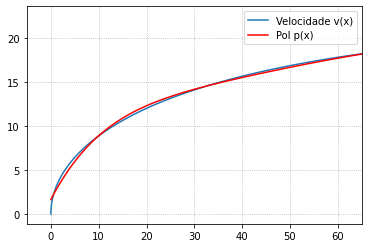

In [14]:

p = zb.fit(sol.y[0], sol.y[1], 50)

#plt.plot(sol.t, sol.y[0], label='Distância x(t)')
#plt.plot(sol.t, sol.y[1], label='Velocidade v(t)')

plt.plot(sol.y[0], sol.y[1], label='Velocidade v(x)')
plt.plot(sol.y[0], p(sol.y[0]), c='red',label='Pol p(x)')

plt.legend()
plt.grid(ls='dotted')
plt.xlim(-5, 65)

In [16]:
Vlo_index = zb.get_index_of_nearest_element(
    sol.y[1], Zb.veloc_Req(Zb.CLmax, rho) * 1.2
)

sol.y[0][Vlo_index] + Zb.hdist_Obstacle()

29.527461439147856

In [115]:
Zb.takeOff_Distance_EDO() + Zb.hdist_Obstacle()


155.08044195058778

In [17]:
Zb.takeOff_Distance_Anderson(), Zb.takeOff_Distance_AproxAnderson(), Zb.takeOff_Distance_AproxMiranda()


(34.172920565965875, 30.351197558426875, 21.643392348554414)

In [ ]:
Zb = zb.Airplane(Load=5.5)

rho=1.225
Ground_Effect=False
pol_grau=6

#PRECISA INVERTER OLD V, T --> NEW T, V
def ED0_takeOff(t, v): 

    dxdt = v
    T = Zb.trac_Available(v, rho)
    D = Zb.drag_Force(v, Zb.CLLO, rho, Ground_Effect)  # Testar CLmax e CLn or CLLO
    R = Zb.mi * (Zb.W - Zb.lift_Force(v, Zb.CLLO, rho))
    dvdt = (T - D - R) / (Zb.M)

    return [dvdt, dxdt]

tempo_limite = 20
tempo = np.linspace(1e-1, tempo_limite, 20)

# Solução EDO V(t) e aproximando para polinômio
#V = odeint(ED0_takeOff, 0., tempo)

t_span = np.array([0., 20.])
Y0 = np.array([0.])

V = solve_ivp(ED0_takeOff, t_span, Y0, t_eval=tempo)
pol = zb.fit(tempo, V.y[0], pol_grau)  # Polinomio de grau 6

V.message